Preâmbulo

In [6]:
# Inteligência Artificial
# Alunos: Helon e Tiago

import pandas as pd # para manipulação e análise de dados
import numpy as np # computação científica - utilizada nas curvas gaussinas

import matplotlib.pyplot as plt # para geração de gráficos

from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, auc # para a matrix de confusão

import joblib
import os


In [7]:
# Bibliotecas específicas para o aprendizado de máquina
from sklearn.model_selection import train_test_split # permite dividir o conjunto de dados em TREINAMENTO E TESTE
from sklearn.metrics import r2_score # a métrica "r quadrado" permite sabermos o quão eficiente foi um modelo que nós treinamos


from sklearn.neural_network import MLPClassifier # é utilizada para criar e treinar diferentes modelos de RNA com diversas combinações de hiperparâmetros

from sklearn.metrics import roc_auc_score # é utilizada para calcular a métrica de área sob a curva ROC (Receiver Operating Characteristic) que é frequentemente usada para avaliar o desempenho de modelos de classificação binária

# Importar a biblioteca para busca de hiperparâmetros com algoritmos genéticos
from geneticalgorithm import geneticalgorithm as ga




Carregamento do Dataset

In [8]:
dataset = pd.read_csv("D:\\Users\\tiago\\OneDrive\\SI UFRRJ\\5p\\Inteligencia Artificial\\Trabalhos\\Trabalho 5 - Redes Neurais Art e Tratamento de Dados\\Fase 2\\Dados escolhidos (veio la da Fase 1)\\dados_escolhidos (copia Fase 1).csv", sep = ";")
# Substitua 'id' pelo nome correto da primeira coluna que você deseja remover
dataset = dataset.iloc[:, 1:] # removendo a primeira coluna: seleciona todas as linhas (indicadas pelo :) e todas as colunas a partir da segunda coluna (índice 1 em diante)

In [9]:
dataset.head()

,V1,V2,V7,V8,V12,V14,V15
0,0.192459,0.050191,0.397059,0.131057,0.005847,0.635945,1.0
1,0.303054,0.315094,0.779412,0.509340,0.007254,0.456221,1.0
2,0.002424,0.521228,0.602941,0.050738,0.005275,0.239631,1.0
3,0.014140,0.427120,0.794118,0.358853,0.005671,0.410138,1.0
4,0.260720,0.172144,0.838235,0.193550,0.007386,0.797235,1.0


In [10]:
# Dividindo em conjunto de treinamento e teste (30% dos dados será para teste -> test_size = 0.3)
V1_norm_treino, V1_norm_teste, V2_norm_treino, V2_norm_teste, V7_norm_treino, V7_norm_teste, V8_norm_treino, V8_norm_teste, V12_norm_treino, V12_norm_teste, V14_norm_treino, V14_norm_teste = train_test_split (dataset['V1'], dataset['V2'], dataset['V7'], dataset['V8'], dataset['V12'], dataset['V14'], test_size=0.3)


# Crie um DataFrame contendo todas as colunas de entrada
x_treino = pd.DataFrame({
    'V1': V1_norm_treino,
    'V2': V2_norm_treino,
    'V7': V7_norm_treino,
    'V8': V8_norm_treino,
    'V12': V12_norm_treino,
    'V14': V14_norm_treino
})

# Conjunto de teste (pra previsão)
x_teste = pd.DataFrame({
    'V1': V1_norm_teste,
    'V2': V2_norm_teste,
    'V7': V7_norm_teste,
    'V8': V8_norm_teste,
    'V12': V12_norm_teste,
    'V14': V14_norm_teste
})


# Y é a sáida, o resultado esperado. Que aqui, é a classe (-> a coluna 'V15' que representa as classes).
y_de_treino = dataset.loc[x_treino.index, 'V15']
y_de_teste = dataset.loc[x_teste.index, 'V15'] # Calcule a variável de saída real para o conjunto de teste (y_de_teste)



#EXPORTANDO variáveis para um arquivo Python:

# Coloque aqui o caminho e nome do arquivo Python que você deseja criar
arquivo_python = 'variaveis_mlp.py'

# Variáveis que você deseja exportar
variaveis_exportar = [V1_norm_treino, V1_norm_teste, V2_norm_treino, V2_norm_teste, V7_norm_treino, V7_norm_teste, V8_norm_treino, V8_norm_teste, V12_norm_treino, V12_norm_teste, V14_norm_treino, V14_norm_teste, x_treino, x_teste, y_de_treino, y_de_teste]

# Salvar as variáveis no arquivo Python
joblib.dump(variaveis_exportar, arquivo_python)


['variaveis_mlp.py']

Achando melhores parâmetros iniciais - Fazendo combinações (Processamentos)

In [11]:
# No contexto de aprendizado de máquina, um "modelo de rede" refere-se a uma instância específica de um modelo de rede neural.

import os

# A melhor função de ativação para a maioria dos casos não é a sigmóide ("logistic") MAS SIM a "reLU" !

# Função para treinar e avaliar a rede neural com hiperparâmetros específicos
def train_and_evaluate_model(hidden_layer_sizes, learning_rate_init, momentum):
    rna = MLPClassifier(
        hidden_layer_sizes=hidden_layer_sizes,
        max_iter=2000,
        tol=1e-7,
        learning_rate_init=learning_rate_init,
        momentum=momentum,
        solver="sgd",
        activation="relu",
        learning_rate="constant",
        verbose=0
    ) # <- Crie a instância do classificador MLP:
    # (nº de camadas escondidas (tupla: qntd neurônios camd 1, neur camd 2 ) , nº máx de iterações/épocas , tolerância da melhora limite do erro , estratégia = descida gdt estocástico , função de ativação, taxa constante )        - Rede neural artificial de multiplas camadas
    # verbose: para podermos ver o que está acontecendo em cada época
    # SGD significa Stochastic Gradient Descent = descida do gradiente estocástico (é um algoritmo de otimização) #EXTRA

    # Treinar o modelo com o conjunto de treinamento
    rna.fit(x_treino, y_de_treino)

    # Previsão do conjunto de teste (com as variáveis separadas para esse "teste" - "posterior") - Avaliar o modelo no conjunto de teste:
    y_pred = rna.predict(x_teste)
    accuracy = np.mean(y_pred == y_de_teste) * 100
    return accuracy, rna


In [12]:
# Valores para passar como "hiperparâmetros"
hidden_layer_sizes_values = [(10, 5), (20, 10), (30, 15)]
learning_rate_init_values = [0.01, 0.1, 0.2]
momentum_values = [0.5, 0.9, 0.99]

# Número de treinamentos para cada combinação de hiperparâmetros
num_de_treinos = 20 # 20 pelo menos que foi pedido

# Lista para armazenar as estatísticas de todos os modelos treinados
global estatisticas_dos_modelos
estatisticas_dos_modelos = []


In [13]:
# Lista para armazenar as estatísticas dos modelos treinados
estatisticas_dos_modelos = []

# Loop para testar diferentes combinações de hiperparâmetros
for hidden_layer_sizes in hidden_layer_sizes_values:
    for learning_rate_init in learning_rate_init_values:
        for momentum in momentum_values:
            accuracies = []
            trained_models = []

            # Treinamento do modelo várias vezes para obter estatísticas mais realistas
            for i in range(num_de_treinos):
                accuracy, model = train_and_evaluate_model(hidden_layer_sizes, learning_rate_init, momentum)
                accuracies.append(accuracy)
                trained_models.append(model)

            # Média e desvio padrão das acurácias
            mean_accuracy = np.mean(accuracies)
            std_accuracy = np.std(accuracies)

            # Salvar o modelo com a melhor acurácia em um arquivo:
            # O modelo com a melhor acurácia é escolhido dentro do loop de treinamento repetido (20 vezes) para cada combinação de hiperparâmetros.
            melhor_modelo_idx = np.argmax(accuracies)
            melhor_modelo = trained_models[melhor_modelo_idx]
            nome_do_arquivo = f"model_{hidden_layer_sizes}_{learning_rate_init}_{momentum}_accuracy_{accuracies[melhor_modelo_idx]:.2f}.pkl"
            
            # Verificar se a pasta 'modelos' existe, se não existir, criar a pasta
            pasta_modelos = 'modelos'
            if not os.path.exists(pasta_modelos):
                os.makedirs(pasta_modelos)

            # Caminho completo para salvar o modelo dentro da pasta 'modelos'
            modelo_salvar = os.path.join(pasta_modelos, nome_do_arquivo)
            joblib.dump(melhor_modelo, modelo_salvar)

            # Armazenar as estatísticas do modelo
            estatisticas_dos_modelos.append({
                "hidden_layer_sizes": hidden_layer_sizes,
                "learning_rate_init": learning_rate_init,
                "momentum": momentum,
                "mean_accuracy": mean_accuracy,
                "std_accuracy": std_accuracy,
                "melhor_modelo_file": nome_do_arquivo
            })

# Imprimir as estatísticas dos modelos treinados
for stats in estatisticas_dos_modelos:
    print(stats)

d:\Users\tiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Users\tiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Users\tiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Users\tiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the 

{'hidden_layer_sizes': (10, 5), 'learning_rate_init': 0.01, 'momentum': 0.5, 'mean_accuracy': 67.14285714285714, 'std_accuracy': 3.4693877551020424, 'melhor_modelo_file': 'model_(10, 5)_0.01_0.5_accuracy_73.47.pkl'}
{'hidden_layer_sizes': (10, 5), 'learning_rate_init': 0.01, 'momentum': 0.9, 'mean_accuracy': 71.3265306122449, 'std_accuracy': 5.789411409185423, 'melhor_modelo_file': 'model_(10, 5)_0.01_0.9_accuracy_81.63.pkl'}
{'hidden_layer_sizes': (10, 5), 'learning_rate_init': 0.01, 'momentum': 0.99, 'mean_accuracy': 67.65306122448979, 'std_accuracy': 5.486532677049007, 'melhor_modelo_file': 'model_(10, 5)_0.01_0.99_accuracy_83.67.pkl'}
{'hidden_layer_sizes': (10, 5), 'learning_rate_init': 0.1, 'momentum': 0.5, 'mean_accuracy': 70.61224489795917, 'std_accuracy': 5.453220088117301, 'melhor_modelo_file': 'model_(10, 5)_0.1_0.5_accuracy_81.63.pkl'}
{'hidden_layer_sizes': (10, 5), 'learning_rate_init': 0.1, 'momentum': 0.9, 'mean_accuracy': 69.38775510204081, 'std_accuracy': 5.2825220838

Pós-processamento final

Top 5 modelos:
Modelo 1
Hiperparâmetros: (30, 15) 0.01 0.9
Acurácia Média: 76.02040816326533
Desvio Padrão da Acurácia: 4.023825337373539

R2 RNA: -0.26102941176470584


d:\Users\tiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


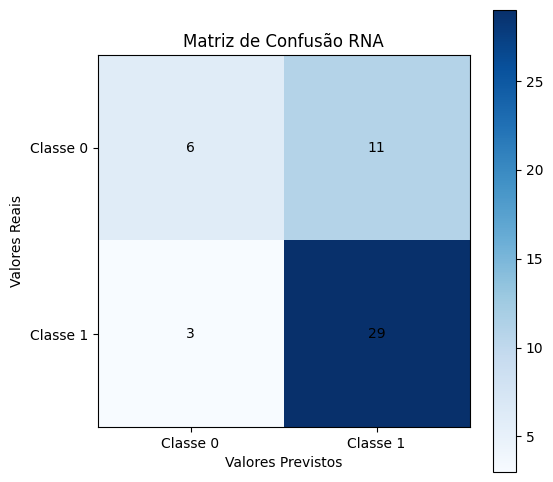

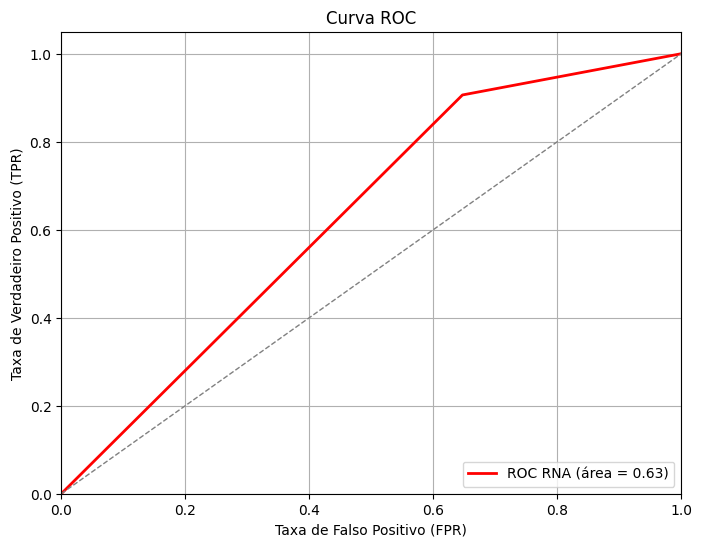

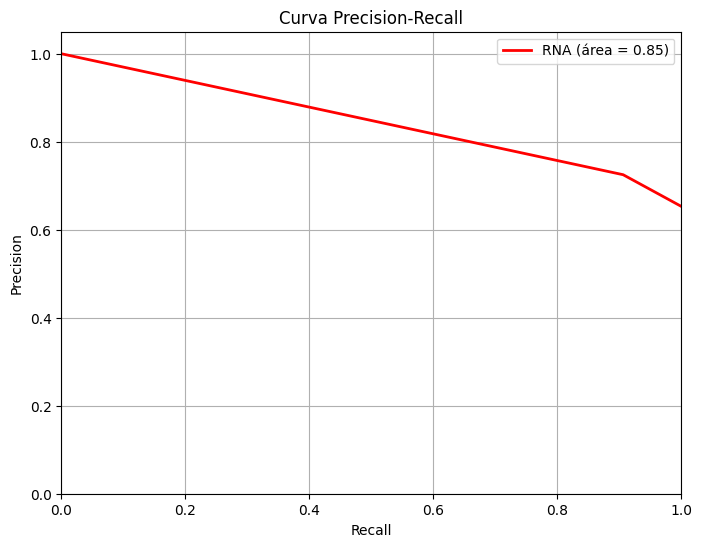

Modelo 2
Hiperparâmetros: (30, 15) 0.1 0.99
Acurácia Média: 75.9183673469388
Desvio Padrão da Acurácia: 6.725411042156767

R2 RNA: 0.09926470588235292


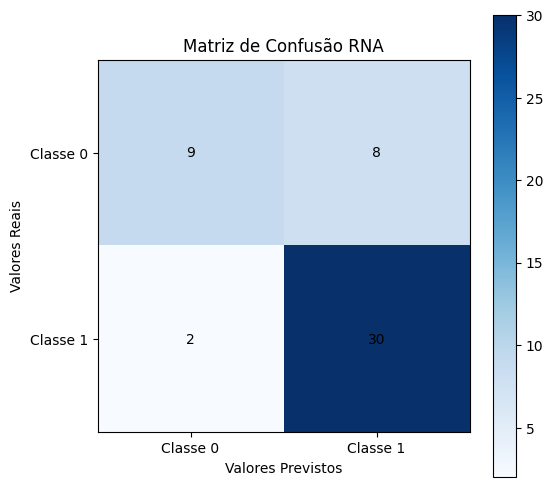

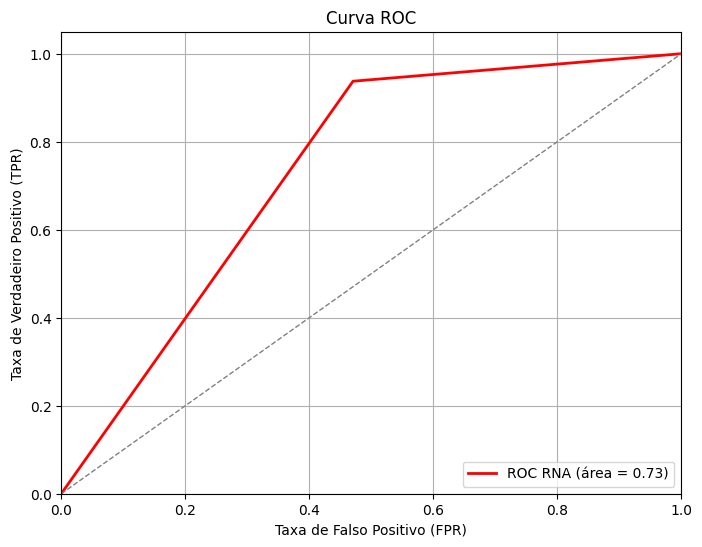

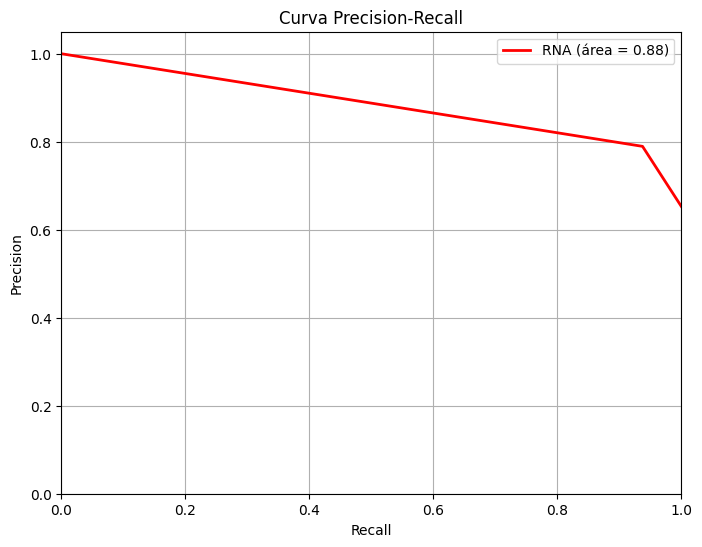

Modelo 3
Hiperparâmetros: (20, 10) 0.01 0.9
Acurácia Média: 75.71428571428571
Desvio Padrão da Acurácia: 4.177446834787491

R2 RNA: 0.27941176470588236


d:\Users\tiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


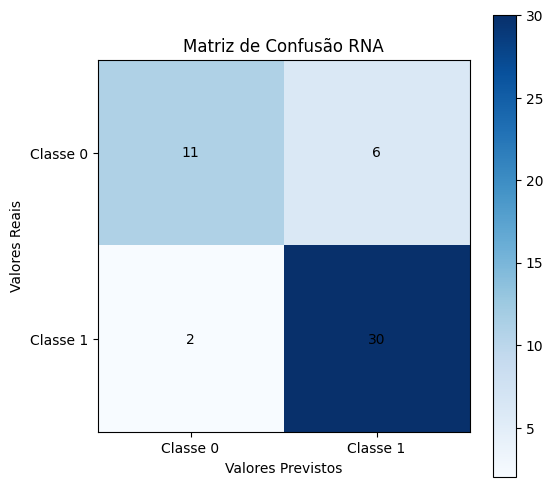

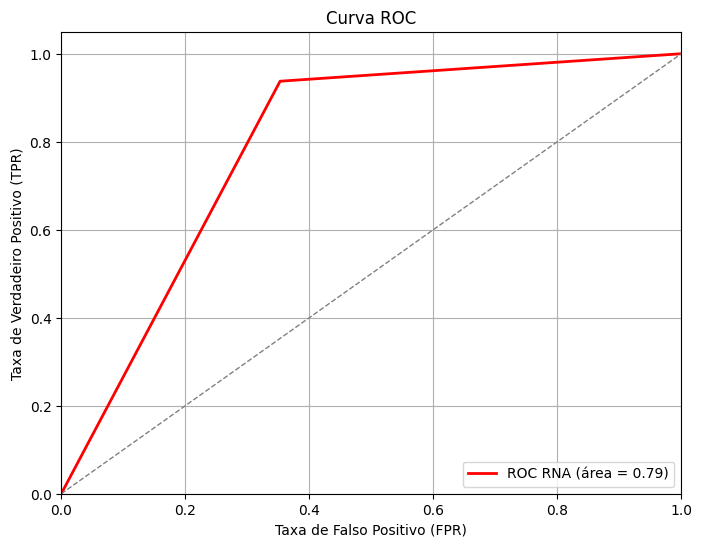

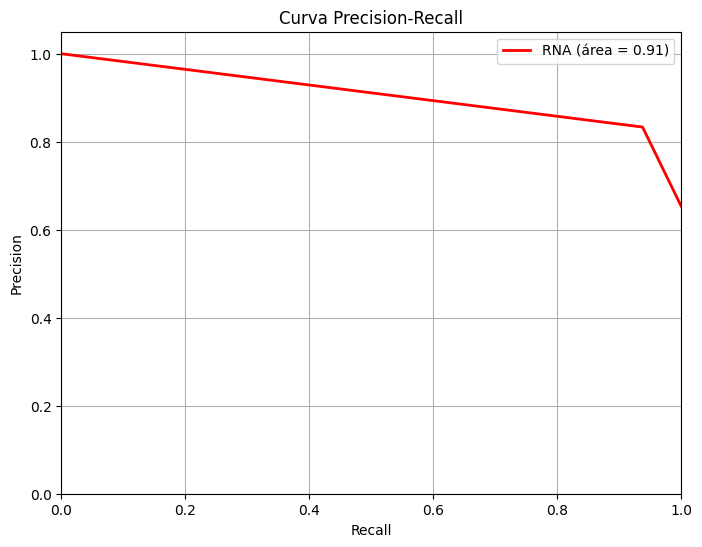

Modelo 4
Hiperparâmetros: (30, 15) 0.2 0.9
Acurácia Média: 74.79591836734696
Desvio Padrão da Acurácia: 5.673139030170466

R2 RNA: -0.26102941176470584


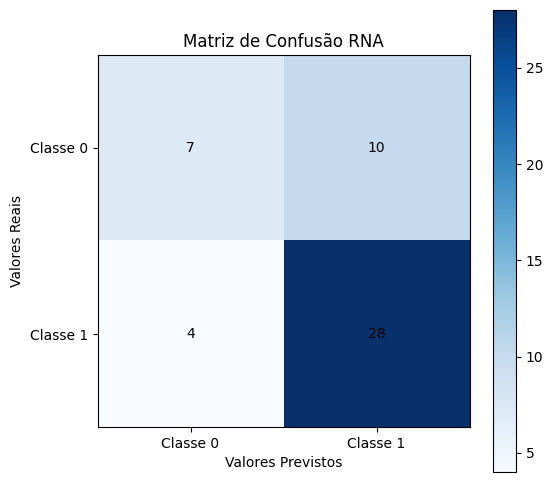

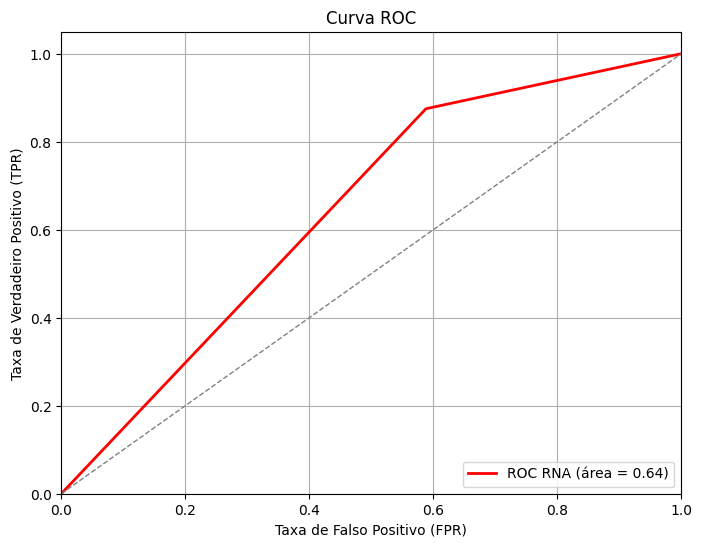

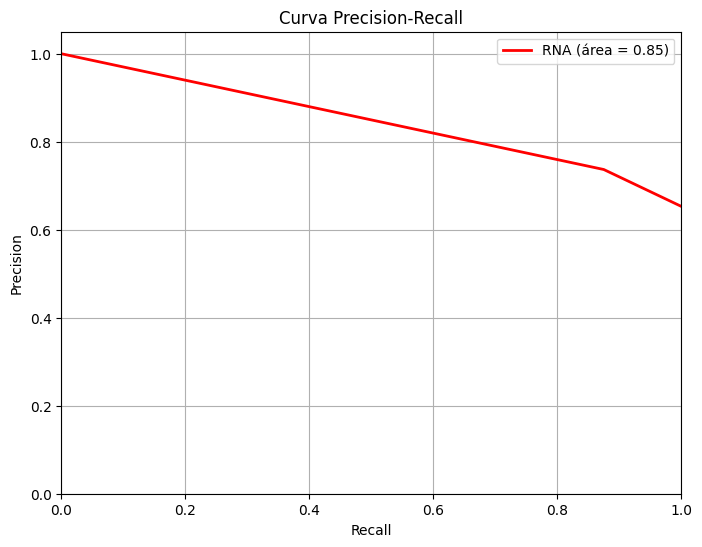

Modelo 5
Hiperparâmetros: (30, 15) 0.1 0.9
Acurácia Média: 74.48979591836735
Desvio Padrão da Acurácia: 3.7353071872904318

R2 RNA: -0.17095588235294112


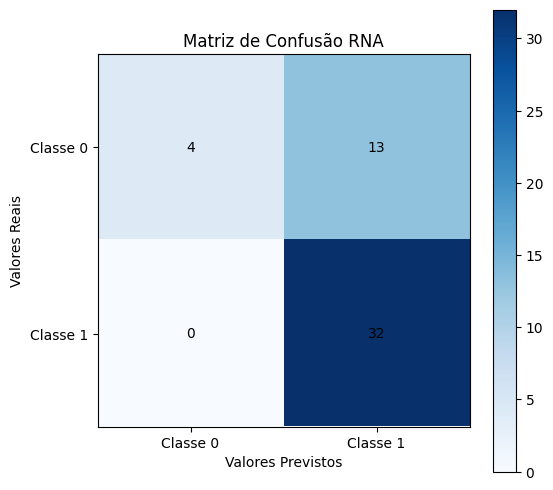

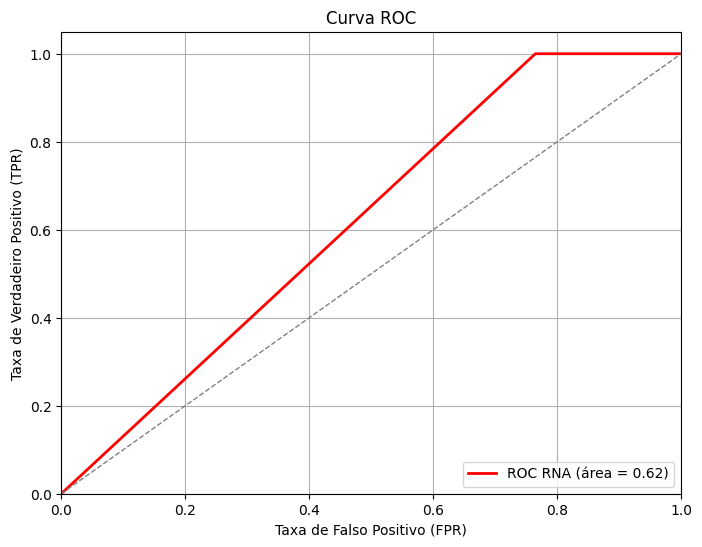

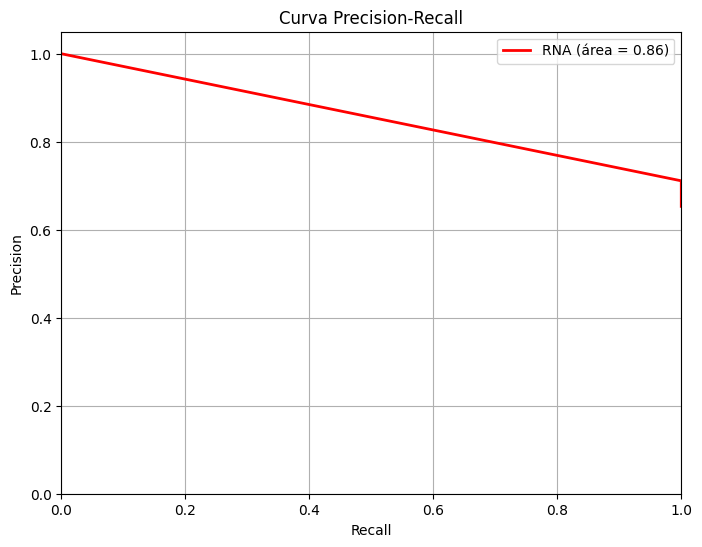

In [14]:
# Ordenar os modelos pelo desempenho médio (maiores acurácias primeiro)
estatisticas_dos_modelos.sort(key=lambda x: x["mean_accuracy"], reverse=True)

# Imprimir as estatísticas dos 5 melhores modelos
print("Top 5 modelos:")
for i, model_stats in enumerate(estatisticas_dos_modelos[:5]):
    print(f"Modelo {i+1}")
    print("Hiperparâmetros:", model_stats["hidden_layer_sizes"], model_stats["learning_rate_init"], model_stats["momentum"])
    print("Acurácia Média:", model_stats["mean_accuracy"])
    print("Desvio Padrão da Acurácia:", model_stats["std_accuracy"])
    print()

    # Treinar o melhor modelo novamente
    best_model = MLPClassifier(
        hidden_layer_sizes=model_stats["hidden_layer_sizes"],
        max_iter=2000,
        tol=1e-7,
        learning_rate_init=model_stats["learning_rate_init"],
        momentum=model_stats["momentum"],
        solver="sgd",
        activation="relu",
        learning_rate="constant",
        verbose=0
    )
    best_model.fit(x_treino, y_de_treino)

    # Previsão no conjunto de teste
    y_rna_previsao = best_model.predict(x_teste)

    # Calcular o R^2 (R Quadrado - eficiência)
    r2_rna = r2_score(y_de_teste, y_rna_previsao)
    print("R2 RNA:", r2_rna)

    # Gráficos
    # Matriz de confusão
    conf_matrix_rna = confusion_matrix(y_de_teste, y_rna_previsao)

    # Plot da matriz de confusão
    plt.figure(figsize=(6, 6))
    plt.imshow(conf_matrix_rna, cmap='Blues', interpolation='nearest')
    plt.title('Matriz de Confusão RNA')
    plt.xticks([0, 1], ['Classe 0', 'Classe 1'])
    plt.yticks([0, 1], ['Classe 0', 'Classe 1'])
    for i in range(2):
        for j in range(2):
            plt.text(j, i, str(conf_matrix_rna[i, j]), ha='center', va='center', color='white' if conf_matrix_rna[i, j] > 50 else 'black')

    plt.colorbar()
    plt.xlabel('Valores Previstos')
    plt.ylabel('Valores Reais')
    plt.grid(False)
    plt.show()

    # Curva ROC
    roc_auc_rna = roc_auc_score(y_de_teste, y_rna_previsao)
    fpr_rna, tpr_rna, _ = roc_curve(y_de_teste, y_rna_previsao)

    # Plot da curva ROC
    plt.figure(figsize=(8, 6))
    plt.plot(fpr_rna, tpr_rna, color='red', lw=2, label='ROC RNA (área = %0.2f)' % roc_auc_rna)
    plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Taxa de Falso Positivo (FPR)')
    plt.ylabel('Taxa de Verdadeiro Positivo (TPR)')
    plt.title('Curva ROC')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

    # Curva Precision-Recall
    prec_rna, rec_rna, _ = precision_recall_curve(y_de_teste, y_rna_previsao)

    # Plot da curva Precision-Recall
    plt.figure(figsize=(8, 6))
    plt.plot(rec_rna, prec_rna, color='red', lw=2, label='RNA (área = %0.2f)' % auc(rec_rna, prec_rna))
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Curva Precision-Recall')
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.show()


#EXPORTANDO VARIÁVEL para um arquivo Python:
# Coloque aqui o caminho e nome do arquivo Python que você deseja criar
arquivo_python = 'estatisticas_modelos_mlp.py'

# Salvar a lista de estatísticas no arquivo Python
joblib.dump(estatisticas_dos_modelos, arquivo_python)